<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Johan_Mazorra_LS_DS13_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [136]:
# Let's go ahead and load up the dataset.
import pandas as pd

train = pd.read_csv('fifa_ranking.csv')
test = pd.read_csv('fifa_ranking.csv')

print(train.shape)
train.head()

(57793, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0,57,0,0,0,0,0,0,0,0,0,UEFA,1993-08-08
1,2,Italy,ITA,0,57,0,0,0,0,0,0,0,0,0,UEFA,1993-08-08
2,3,Switzerland,SUI,0,50,9,0,0,0,0,0,0,0,0,UEFA,1993-08-08
3,4,Sweden,SWE,0,55,0,0,0,0,0,0,0,0,0,UEFA,1993-08-08
4,5,Argentina,ARG,0,51,5,0,0,0,0,0,0,0,0,CONMEBOL,1993-08-08


In [94]:
train.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0,0,1,0,0,0,0,0,0,0,0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0,0,1,0,0,0,0,0,0,0,0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0,0,1,0,0,0,0,0,0,0,0,CAF,2018-06-07
57791,206,Somalia,SOM,0,0,1,0,0,0,0,0,0,0,0,CAF,2018-06-07
57792,206,Tonga,TGA,0,0,1,0,0,0,0,0,0,0,0,OFC,2018-06-07


In [95]:
train.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,"57,793","57,793","57,793","57,793","57,793","57,793","57,793","57,793","57,793","57,793","57,793","57,793"
mean,102,122,332,-0,62,62,61,31,60,18,59,12
std,59,260,303,6,138,138,138,69,136,41,136,27
min,1,0,0,-72,0,0,0,0,0,0,0,0
25%,51,0,56,-2,0,0,0,0,0,0,0,0
50%,101,0,272,0,0,0,0,0,0,0,0,0
75%,152,93,525,1,32,32,27,13,22,6,21,4
max,209,"1,775","1,920",92,"1,159","1,159","1,170",585,"1,160",348,"1,201",240


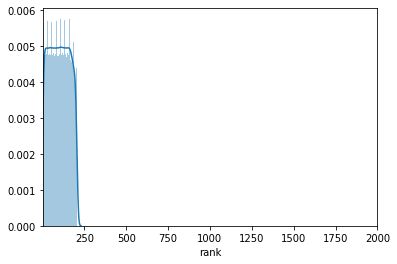

In [96]:
# Ok, everything looks as expected.

# Let's import the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# The dataset I would be using is basically the FIFA soccer rankings for every national team from 1993 through 2008. 
# It comes directly from the FIFA database of those years and it's transferred into a CSV file. My objective is to
# predict which teams will most likely come on the top 10 positions for the next year (2019). The best part is
# I can actually check if my predictions are somewhat accurate since I could check the official ranking on the FIFA
# website for 2019.
# The target I would be using is rank which is the position of each team for that month's period.

# Let's get the target's distribution in a graph.
ax = sns.distplot(train['rank'])
ax.set_xlim([1,2000])
plt.show()

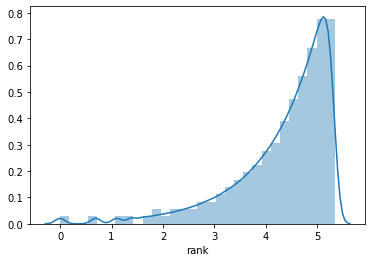

In [97]:
# Okay, now it looks a bit better.
log_usages = train['rank'].apply(np.log)
ax = sns.distplot(log_usages, bins=30)
plt.show()

In [98]:
train['rank_log'] = train['rank'].apply(np.log)
test['rank_log'] = test['rank'].apply(np.log)

# Let's create baseline check dataframes for training and testing data
# and then impute missing values.
bc_train = train[['rank']]
bc_test = test[['rank']]

bc_train = bc_train.fillna(value=0.05)
bc_test = bc_test.fillna(value=0)

bc_train['rank_log'] = bc_train['rank'].apply(np.log)
bc_test['rank_log'] = bc_test['rank'].apply(np.log)

print('Baseline Mean:',train['rank'].mean())
print('Baseline Log Mean:',train['rank_log'].mean())

Baseline Mean: 101.62808644645546
Baseline Log Mean: 4.326060456400682


In [99]:
# Let's check the baselines mean absolute error and r^2 scores.
from sklearn.metrics import mean_absolute_error, r2_score
print('Baseline MAE:',mean_absolute_error(bc_train['rank'], [bc_train['rank'].mean() for x in bc_train['rank']]))
print('Log Baseline MAE:',mean_absolute_error(bc_train['rank_log'], [bc_train['rank_log'].mean() for x in bc_train['rank_log']]))
print('Baseline R^2 score:',r2_score(bc_train['rank'], [bc_train['rank'].mean() for x in bc_train['rank']]))
print('Log Baseline R^2 score:',r2_score(bc_train['rank_log'], [bc_train['rank_log'].mean() for x in bc_train['rank_log']]))

Baseline MAE: 50.670327534450855
Log Baseline MAE: 0.7193894240632245
Baseline R^2 score: 0.0
Log Baseline R^2 score: 0.0


In [137]:
# Now let's clean up the data by removing useless columns.
useless_data = [x for x in train.columns if 'cur_year_avg_weighted' in x or 'last_year_avg_weighted' in x or 'two_year_ago_weighted' in x or 'three_year_ago_weighted' in x or 'confederation' in x or 'country_abrv' in x]
useless_data

train = train.drop(columns=useless_data)
test = test.drop(columns=useless_data)

train.head()

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,rank_date
0,1,Germany,0,57,0,0,0,0,0,1993-08-08
1,2,Italy,0,57,0,0,0,0,0,1993-08-08
2,3,Switzerland,0,50,9,0,0,0,0,1993-08-08
3,4,Sweden,0,55,0,0,0,0,0,1993-08-08
4,5,Argentina,0,51,5,0,0,0,0,1993-08-08


In [138]:
test.head()

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,rank_date
0,1,Germany,0,57,0,0,0,0,0,1993-08-08
1,2,Italy,0,57,0,0,0,0,0,1993-08-08
2,3,Switzerland,0,50,9,0,0,0,0,1993-08-08
3,4,Sweden,0,55,0,0,0,0,0,1993-08-08
4,5,Argentina,0,51,5,0,0,0,0,1993-08-08


In [139]:
# Let me check the dtypes so I can remove those 0s.
train.dtypes

rank                    int64
country_full           object
total_points          float64
previous_points         int64
rank_change             int64
cur_year_avg          float64
last_year_avg         float64
two_year_ago_avg      float64
three_year_ago_avg    float64
rank_date              object
dtype: object

In [0]:
for col in ['three_year_ago_avg', 'two_year_ago_avg', 'last_year_avg', 'total_points', 'cur_year_avg']:
    train[col] = train[col].astype('int64')

In [141]:
# Ok, that worked.
train.dtypes

rank                   int64
country_full          object
total_points           int64
previous_points        int64
rank_change            int64
cur_year_avg           int64
last_year_avg          int64
two_year_ago_avg       int64
three_year_ago_avg     int64
rank_date             object
dtype: object

In [142]:
# Let's do the same for the testing data.
test.dtypes

rank                    int64
country_full           object
total_points          float64
previous_points         int64
rank_change             int64
cur_year_avg          float64
last_year_avg         float64
two_year_ago_avg      float64
three_year_ago_avg    float64
rank_date              object
dtype: object

In [0]:
for col in ['three_year_ago_avg', 'two_year_ago_avg', 'last_year_avg', 'total_points', 'cur_year_avg']:
    test[col] = test[col].astype('int64')

In [144]:
test.dtypes

rank                   int64
country_full          object
total_points           int64
previous_points        int64
rank_change            int64
cur_year_avg           int64
last_year_avg          int64
two_year_ago_avg       int64
three_year_ago_avg     int64
rank_date             object
dtype: object

In [147]:
# Now let's remove all the 0s from total_points for both the training and testing data.
train = train[train.total_points != 0]
print(train.shape)
train.head()

(17081, 10)


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,rank_date
40379,1,Netherlands,1596,1542,1,748,976,740,688,2011-08-24
40380,2,Spain,1563,1588,-1,589,1074,796,989,2011-08-24
40381,3,Germany,1329,1305,0,617,860,504,653,2011-08-24
40382,4,England,1176,1146,2,588,620,629,447,2011-08-24
40383,5,Uruguay,1174,1156,0,599,756,415,361,2011-08-24


In [148]:
test = test[test.total_points != 0]
print(test.shape)
test.head()

# Ok, that's much better.

(17081, 10)


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,rank_date
40379,1,Netherlands,1596,1542,1,748,976,740,688,2011-08-24
40380,2,Spain,1563,1588,-1,589,1074,796,989,2011-08-24
40381,3,Germany,1329,1305,0,617,860,504,653,2011-08-24
40382,4,England,1176,1146,2,588,620,629,447,2011-08-24
40383,5,Uruguay,1174,1156,0,599,756,415,361,2011-08-24
